# Time Series Forecasting Models
- In this task, we build a time series forecasting model to predict Tesla's (TSLA) future stock prices. 
- We explore and compare different modeling techniques, including ARIMA, SARIMA, and LSTM. 
- The goal is to develop a robust model that can accurately forecast stock prices and provide actionable insights for portfolio management.

In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.fetchPrepr_close_column import *
from scripts.sarima_model import *
from scripts.lstm_model import *

In [3]:
# import pandas as pd
# Fetch and preprocess data
tsla_data = fetch_data('TSLA', '2015-01-01', '2025-01-31')
train_data, test_data = preprocess_data(tsla_data)

# index = pd.date_range(start='2023-01-24', periods=len(data['Close']), freq='D')
# test_data = pd.DataFrame(test_data, index=index)

# Extract the 'Close' column as a Series
# test_data_series = test_data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
print(train_data)
print(test_data)
# test_data.shape

Ticker            TSLA
Date                  
2015-01-02   14.620667
2015-01-05   14.006000
2015-01-06   14.085333
2015-01-07   14.063333
2015-01-08   14.041333
...                ...
2023-01-17  131.490005
2023-01-18  128.779999
2023-01-19  127.169998
2023-01-20  133.419998
2023-01-23  143.750000

[2028 rows x 1 columns]
Ticker            TSLA
Date                  
2023-01-24  143.889999
2023-01-25  144.429993
2023-01-26  160.270004
2023-01-27  177.899994
2023-01-30  166.660004
...                ...
2025-01-24  406.579987
2025-01-27  397.149994
2025-01-28  398.089996
2025-01-29  389.100006
2025-01-30  400.279999

[507 rows x 1 columns]


In [6]:
print(f"NaN values in test_data: {train_data.isnull().sum()}")
print(f"NaN values in test_data: {test_data.isnull().sum()}")
# print(f"NaN values in predictions: {pd.isnull(predictions).sum()}")

NaN values in test_data: Ticker
TSLA    0
dtype: int64
NaN values in test_data: Ticker
TSLA    0
dtype: int64


In [4]:
# SARIMA Model
print("Training SARIMA model...")
sarima_model = fit_sarima(train_data)

c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\.myvenv11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\.myvenv11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training SARIMA model...


In [5]:
# SARIMA Model
sarima_predictions, sarima_mae, sarima_rmse, sarima_mape = evaluate_sarima(sarima_model, test_data['TSLA'])
print(f"SARIMA Metrics - MAE: {sarima_mae}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}")

test_data head:
Date
2023-01-24    143.889999
2023-01-25    144.429993
2023-01-26    160.270004
2023-01-27    177.899994
2023-01-30    166.660004
Name: TSLA, dtype: float64
predictions head:
2028    142.335427
2029    142.361755
2030    140.949504
2031    140.900303
2032    139.419443
Name: predicted_mean, dtype: float64
SARIMA Metrics - MAE: 91.82462746724023, RMSE: 112.59495522395002, MAPE: nan


c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\.myvenv11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\.myvenv11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\scripts\sarima_model.py:68: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100


In [6]:
# LSTM Model
print("Training LSTM model...")
lookback = 60
X_train, y_train, scaler = prepare_lstm_data(train_data, lookback)
X_test, y_test, _ = prepare_lstm_data(test_data, lookback)

Training LSTM model...


In [7]:
lstm_model = build_lstm_model((X_train.shape[1], 1))
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

c:\Users\pc\Desktop\10_Academy\Week-11\kaim-week-11\.myvenv11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0174
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.5477e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.9079e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.2760e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.6758e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.5790e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.1116e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.7898e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.3669e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.8857e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.5078e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0904e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.3802e-04
Epoch 15/20
62/62 ━━━━━

In [8]:
lstm_predictions, lstm_mae, lstm_rmse, lstm_mape = evaluate_lstm(lstm_model, X_test, y_test, scaler)
print(f"LSTM Metrics - MAE: {lstm_mae}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
LSTM Metrics - MAE: 12.429999715240687, RMSE: 17.09986945861956, MAPE: 12.365887301746463


In [9]:
import matplotlib.pyplot as plt

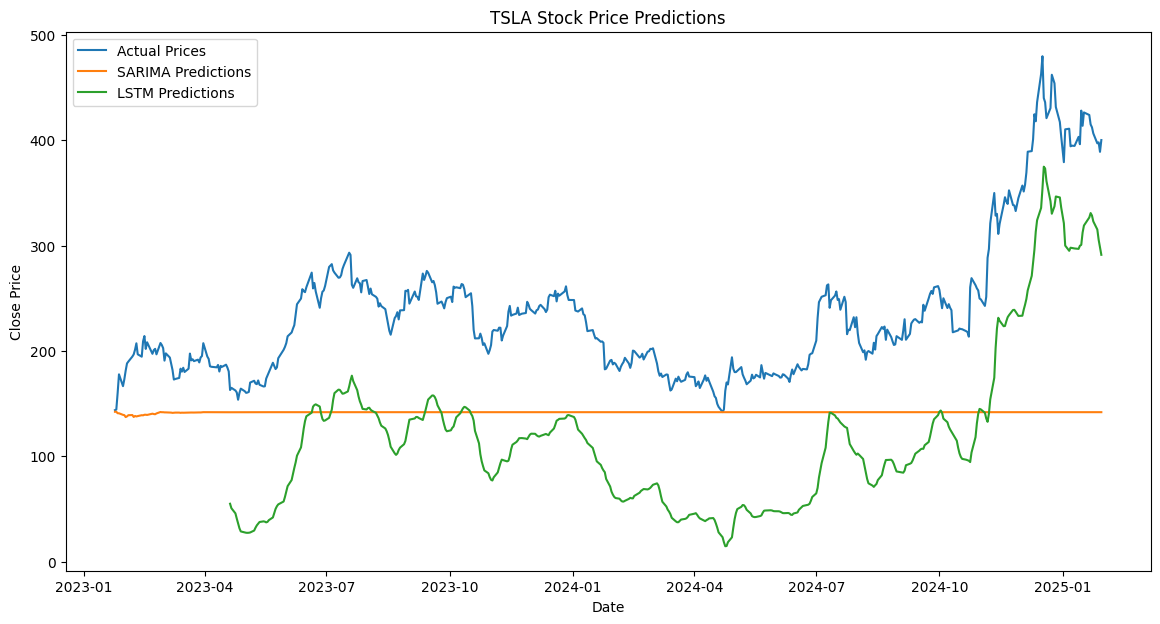

In [11]:
# Plot Results
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['TSLA'], label='Actual Prices')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions')
plt.plot(test_data.index[-len(lstm_predictions):], lstm_predictions, label='LSTM Predictions')
plt.title('TSLA Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [15]:
save_sarima_model(sarima_model)

SARIMA model saved to sarima_model.pkl


In [14]:
save_lstm_model(lstm_model, filename='lstm_model.keras')

LSTM model saved to lstm_model.keras
